In [1]:
import pandas as pd
import  sys 
sys.path.append("../src/")
import data_preparation as dp
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_2301/176984250.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../data/train.csv")
/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_2301/176984250.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("../data/test.csv")


In [3]:
train = train.drop(columns=['MMS', 'Vf', 'De', 'Ernedc (g/km)', 'Enedc (g/km)', 'z (Wh/km)', 'Erwltp (g/km)', 'r' , 'Status'])

In [4]:
test = test.drop(columns=['MMS', 'Vf', 'De', 'Ernedc (g/km)', 'Enedc (g/km)', 'z (Wh/km)', 'Erwltp (g/km)', 'r' , 'Status'])

In [5]:
exp = dp.DataPreparation(train, test)

In [6]:
exp.get_type_list()

In [7]:
exp.impute_train_test_numerical()

Valeurs nuémriques manquantes imputées ✅


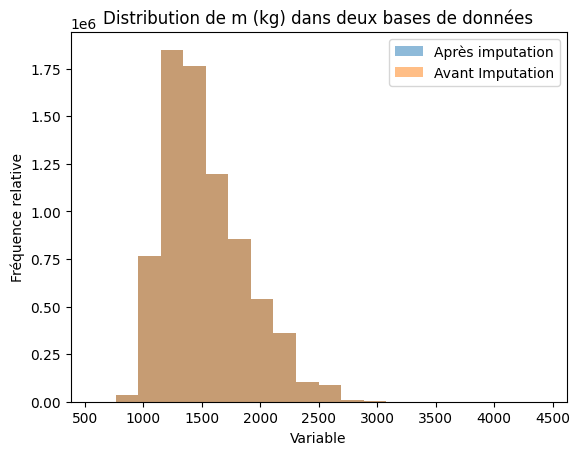

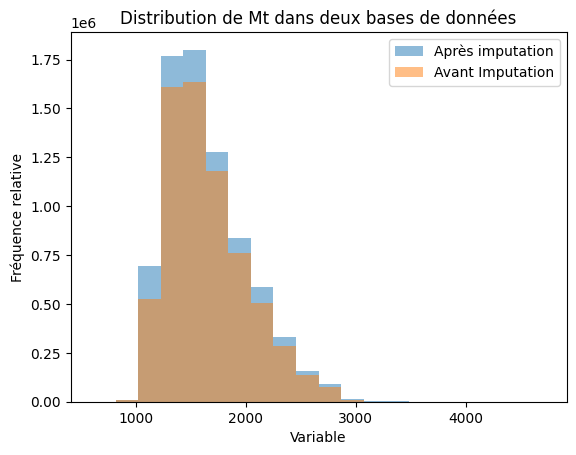

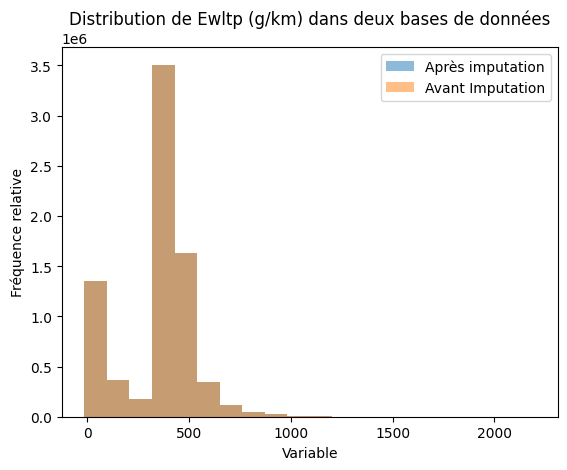

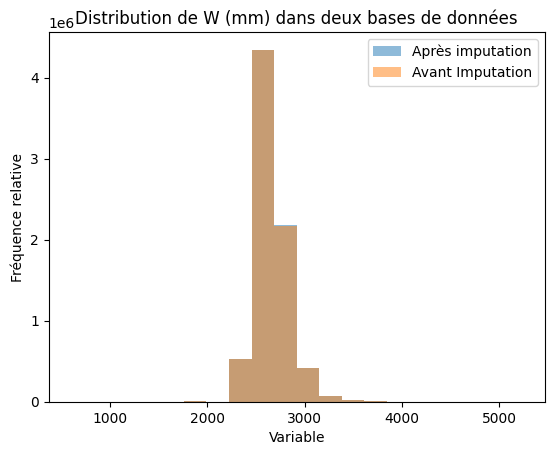

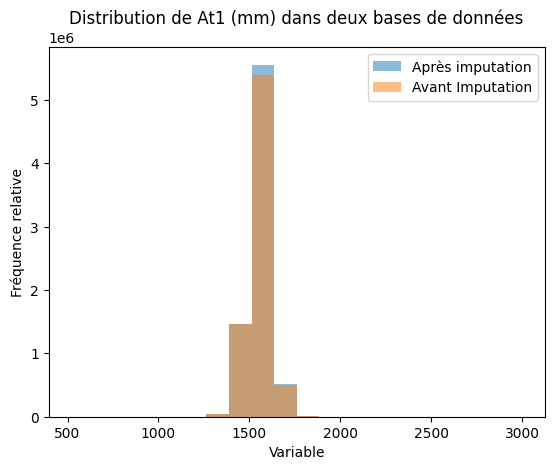

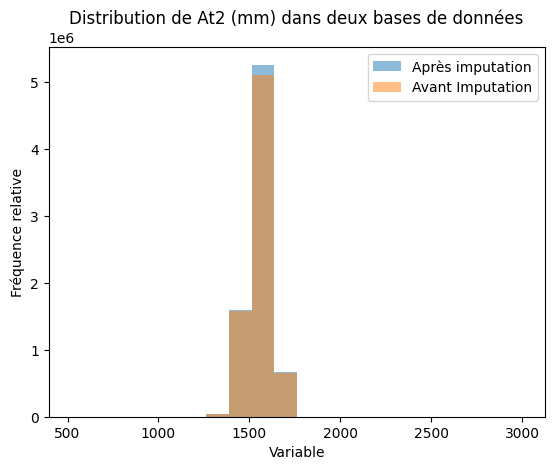

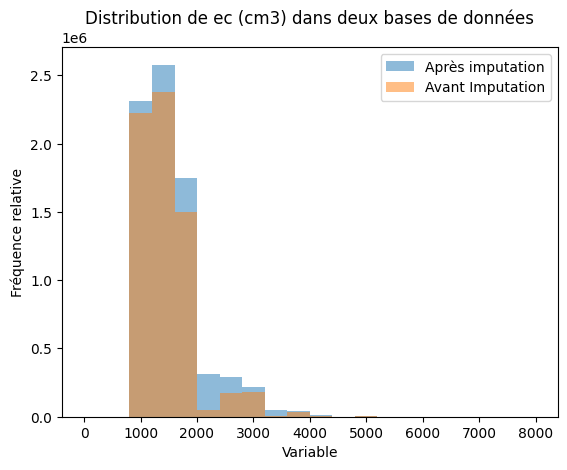

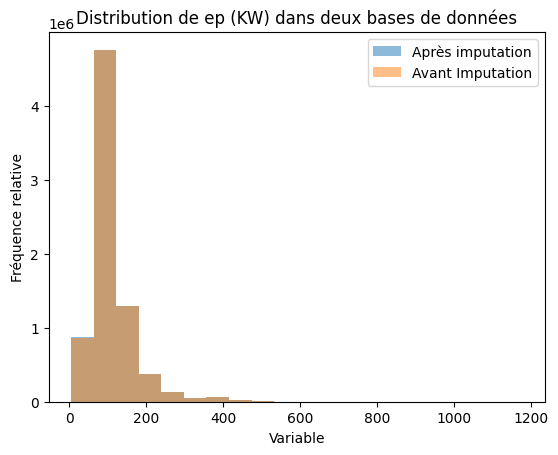

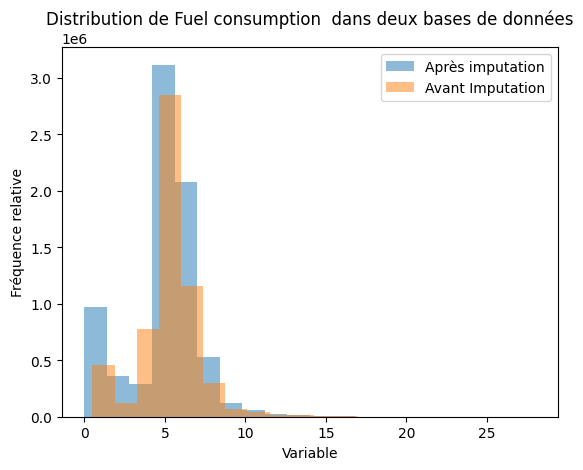

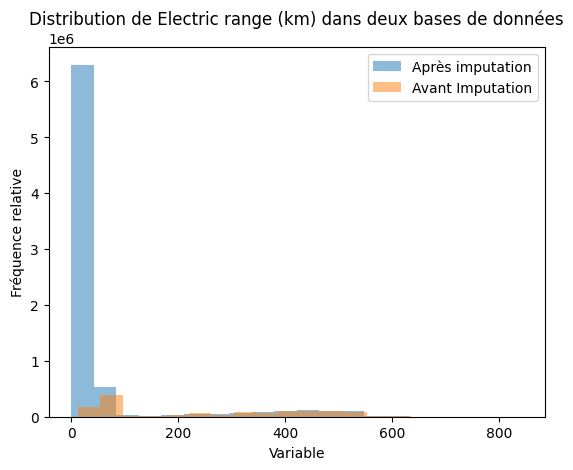

In [9]:
from matplotlib import pyplot as plt

for var in train[exp.col_numericals].columns : 
    plt.hist(exp.train[var], bins=20, alpha=0.5, label='Après imputation')
    
    # Créer un histogramme pour la deuxième base de données
    plt.hist(train[var], bins=20, alpha=0.5, label='Avant Imputation')
    
    # Personnaliser le graphique
    plt.title(f'Distribution de {var} dans deux bases de données')
    plt.xlabel('Variable')
    plt.ylabel('Fréquence relative')
    plt.legend()
    
    # Afficher le graphique
    plt.show()

## MissForest

In [10]:
numericals = exp.col_numericals

In [11]:
numericals.remove("Ewltp (g/km)")

In [15]:
import miceforest as mf

In [16]:
kds = mf.ImputationKernel(
  train[numericals],
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 2 iterations
kds.mice(2)

# Return the completed dataset.
train_imputed = kds.complete_data()

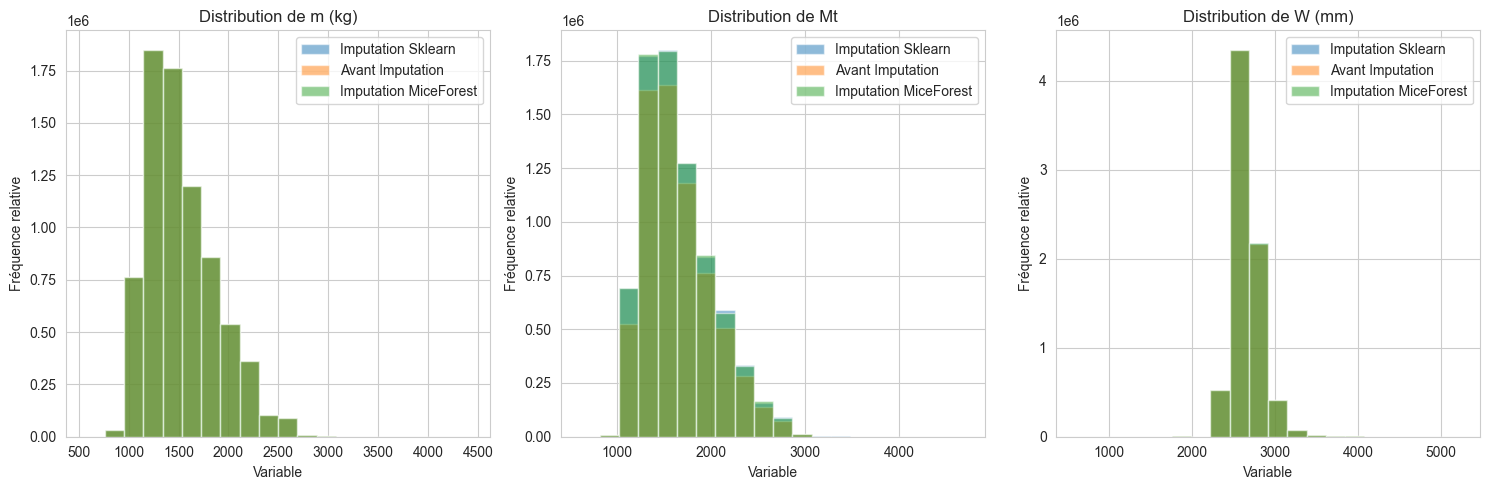

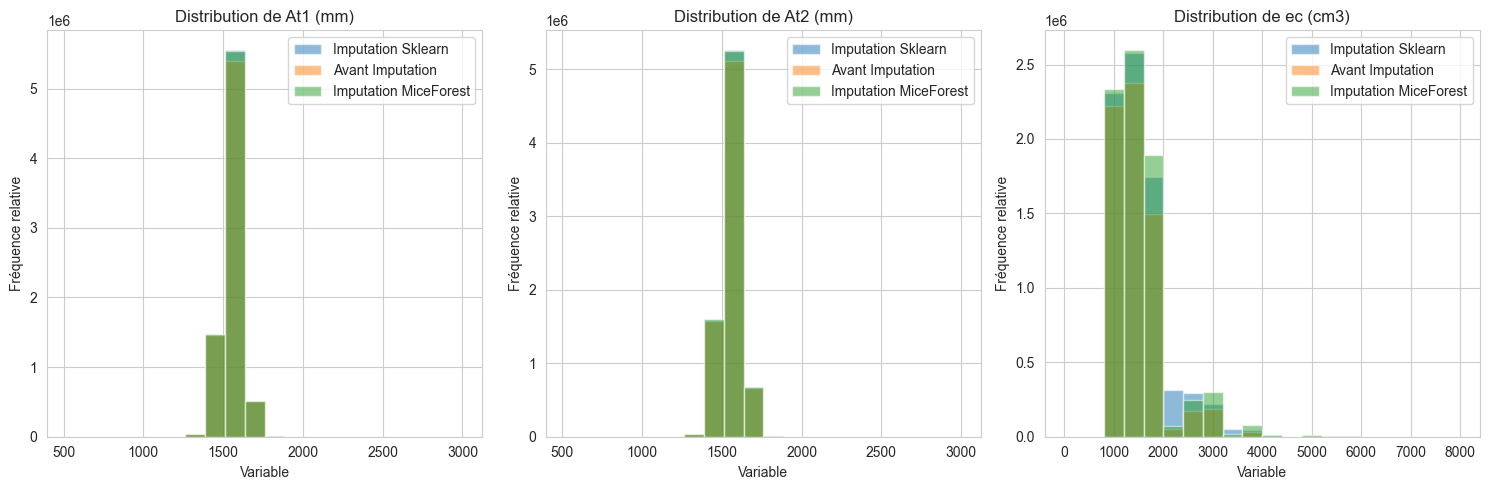

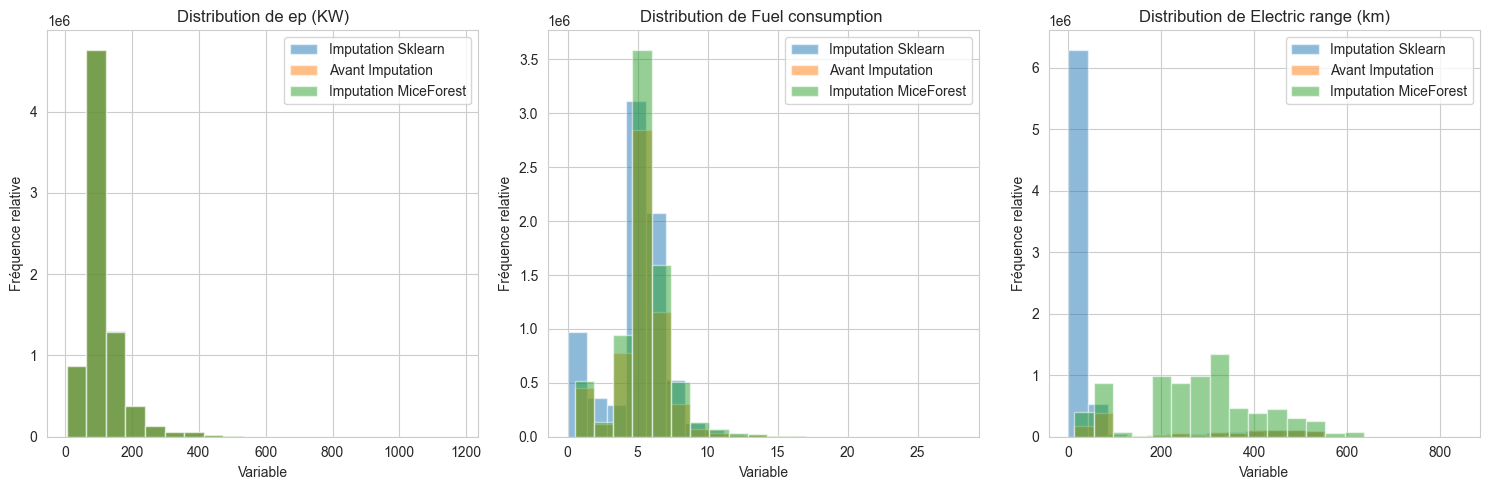

In [25]:
import matplotlib.pyplot as plt

# Nombre de colonnes par ligne
columns_per_row = 3

# Liste des variables numériques
numerical_vars = train[exp.col_numericals].columns

# Nombre total de variables numériques
total_numerical_vars = len(numerical_vars)

# Boucle pour afficher les graphiques
for i, var in enumerate(numerical_vars):
    # Créez un nouveau graphique si c'est le premier graphique de la ligne
    if i % columns_per_row == 0:
        plt.figure(figsize=(15, 5))
    
    # Affichez l'histogramme pour la première base de données (Imputation Sklearn)
    plt.subplot(1, columns_per_row, i % columns_per_row + 1)
    plt.hist(exp.train[var], bins=20, alpha=0.5, label='Imputation Sklearn')
    
    # Affichez l'histogramme pour la deuxième base de données (Avant Imputation)
    plt.hist(train[var], bins=20, alpha=0.5, label='Avant Imputation')
    
    # Affichez l'histogramme pour la troisième base de données (Imputation MiceForest)
    plt.hist(train_imputed[var], bins=20, alpha=0.5, label='Imputation MiceForest')
    
    # Personnalisez le graphique
    plt.title(f'Distribution de {var}')
    plt.xlabel('Variable')
    plt.ylabel('Fréquence relative')
    plt.legend()
    
    # Affichez le graphique si c'est le dernier graphique de la ligne ou le dernier graphique
    if (i % columns_per_row == columns_per_row - 1) or (i == total_numerical_vars - 1):
        plt.tight_layout()
        plt.show()
